# 神经网络（neural network）
## 实战


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import numpy as np

C:\Users\DataMesh\Anaconda3\envs\py3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
print(x_train.shape,y_train.shape)
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

(1000, 20) (1000, 10)
Epoch 1/20
1000/1000 [==============================] - 0s 307us/step - loss: 2.3712 - acc: 0.1020
Epoch 2/20
1000/1000 [==============================] - 0s 18us/step - loss: 2.3477 - acc: 0.1120
Epoch 3/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3309 - acc: 0.1040
Epoch 4/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3160 - acc: 0.0960
Epoch 5/20
1000/1000 [==============================] - 0s 22us/step - loss: 2.3399 - acc: 0.0900
Epoch 6/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3110 - acc: 0.1280
Epoch 7/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3008 - acc: 0.1220
Epoch 8/20
1000/1000 [==============================] - 0s 22us/step - loss: 2.3100 - acc: 0.1240
Epoch 9/20
1000/1000 [==============================] - 0s 18us/step - loss: 2.3016 - acc: 0.1180
Epoch 10/20
1000/1000 [==============================] - 0s 19us/step - loss: 2.3062 - acc: 0.1

In [24]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

tb_cb=keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
cbks=[];
cbks.append(tb_cb);

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                  callbacks= cbks)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [=======================

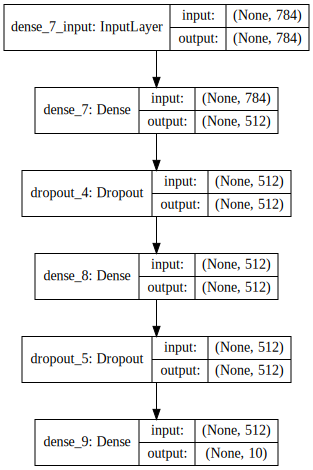

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

# 理论

建立神经网络的主要步骤：

1. 定义模型结构（例如输入特征的数量）
2. 初始化模型的参数
3. 循环：
    - 正向传播（计算当前损失）
    - 反向传播（计算当前梯度）
    - 更新参数（梯度下降）


对于每个样本： $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

所有样本代价函数:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$